# Explore here

In [1]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Modelling
from sklearn.model_selection import train_test_split

#import ipywidgets as widgets
import ipywidgets as widgets
from IPython.display import display, HTML

df_raw=pd.read_csv("/workspaces/exploratory-data-analysis-project/data/raw/internal-link.csv") # Read DataFrame

In [13]:
# ===============================
# INPUT BOX - VARIABLES
# ===============================
font_size = "12px"   # Global font size
cell_width = "100px" # Width for all cells
cell_height = "30px" # Height for all cells
max_table_width = "90000px"  # Width of visible table area before horizontal scroll
# ===============================

# AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
var_type_proposal_threshold_ratio = 2.00 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC

# PLOTS FOR VARIABLE ANALYSIS
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

# OUTLIERS
th_low = 5.0   # [%] Max percentage of low outliers allowed to remove
th_high = 5.0  # [% ]Max percentage of high outliers allowed to remove

# MISSING VALUES
th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# SPLIT
my_test_size = 0.2
random_seed = 42

In [3]:
# STEP 1) EXPLORING THE DATAFRAME
print("STEP 1) EXPLORING THE DATAFRAME")

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 2) FIND DUPLICATES
print("STEP 2) FIND DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING
print("STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# List of columns
columns = df_S3.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=f"col_{i}",
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DROP/KEEP ROW
# -------------------------------
keep_col_drop_down_cells = [widgets.Label(value="Keep col.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
keep_col = []
for i in range(len(columns)):
    drop = widgets.Dropdown(
        options=[True, False],
        value=True,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    keep_col_drop_down_cells.append(drop)
    keep_col.append(drop)
drop_row = widgets.HBox(keep_col_drop_down_cells)

# -------------------------------
# COL NAME ROW
# -------------------------------
col_name_cells = [widgets.Label(value="Col. name", layout=widgets.Layout(width=cell_width, height=cell_height))]
col_name = []
for i in range(len(columns)):
    text = widgets.Text(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    text.style = {'font_size': font_size}
    col_name.append(text)
    col_name_cells.append(text)
name_row = widgets.HBox(col_name_cells)

# -------------------------------
# TARGET ATTRIBUTE ROW
# -------------------------------
target_var_drop_down_cells = [widgets.Label(value="Is the target var.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
target_var = []
for i in range(len(columns)):
    trget_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    target_var_drop_down_cells.append(trget_var_drop)
    target_var.append(trget_var_drop)
target_var_row = widgets.HBox(target_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, drop_row, name_row, target_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)


STEP 1) EXPLORING THE DATAFRAME
- ℹ️ Shape of the original DataFrame: (48895, 16)
- ℹ️ Content of the original DataFrame:


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews         

None

--------------------------------------------------------------
--------------------------------------------------------------

STEP 2) FIND DUPLICATES
- ✅ Original DataFrame does not contain duplicates:
--------------------------------------------------------------
--------------------------------------------------------------

STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING


In [4]:
# STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
print("STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# Validate box inputs
for i in range(len(keep_col)):
    if  keep_col[i].value not in [True, False]:
        raise ValueError("- ❌ Missing Keep/Drop selection in column " + str(i))

for i in range(len(col_name)):
    if col_name[i].value.strip() == "":
        raise ValueError("- ❌ Empty column name found for column " + str(i))

for i in range(len(target_var)):
    if  target_var[i].value not in [True, False]:
        raise ValueError("- ❌ Missing target attribute selection in column " + str(i))
    
target_var_true_count = 0    
for i in range(len(target_var)):
    if target_var[i].value == True:
        target_var_true_count += 1
        if keep_col[i].value == False:
            raise ValueError("❌ Target attribute cannot be dropped!")
if target_var_true_count == 0:
    raise ValueError("❌ You must select exactly one target attribute (none selected)")
if target_var_true_count > 1:
    raise ValueError("❌ You must select exactly one target attribute (selected " + str(target_var_true_count) + ")")


print("- ✅ All selections, column names and target attribute validated successfully")

# Build KEEP bolean mask and rename dictionary
keep_mask = []
rename_dict = {}
for i in range(len(columns)):
    keep_mask.append(keep_col[i].value)
    rename_dict[columns[i]] = col_name[i].value

# Rename columns
df_S4 = df_S4.rename(columns=rename_dict)

# List of columns
columns = df_S4.columns.tolist()

# Select target attribute
for i in range(len(target_var)):
    if target_var[i].value == True:
        y_var = columns[i]
    
# Drop non-relevant columns
df_S4=df_S4.loc[:, keep_mask]

print(f"- ℹ️ Final DataFrame shape: {df_S4.shape}")
display(df_S4.head())

# Count attributes
df_S4_summary = pd.DataFrame({
    "Column": df_S4.columns,
    "Unique_Count": df_S4.nunique().values
})
print("- ℹ️ Final DataFrame unique attributes:")
display(df_S4_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 5.1) AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
print("STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_1 = df_S4.copy()

# List of columns
columns = df_S5_1.columns.tolist()

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S5_1.columns:
    col_data = df_S5_1[col].dropna()
    total_rows = len(df_S5_1)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S5_1[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold_ratio:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold_ratio:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DATA TYPE ROW
# -------------------------------
data_type_drop_down_cells = [widgets.Label(value="Data type:", layout=widgets.Layout(width=cell_width, height=cell_height))]
data_type = []
for i in range(len(columns)):
    if columns[i] in category_var_auto:
        data_type_value = "CATEGORY"
    else:
        data_type_value = "NUMERIC"
    data_type_drop = widgets.Dropdown(
        options=["CATEGORY", "NUMERIC"],
        value=data_type_value,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    data_type_drop_down_cells.append(data_type_drop)
    data_type.append(data_type_drop)
data_type_row = widgets.HBox(data_type_drop_down_cells)

# -------------------------------
# COMBINATION ATTRIBUTE FOR MULTIVARIANT ANALYSIS ROW
# -------------------------------
combi_var_drop_down_cells = [widgets.Label(value="Combination att.", layout=widgets.Layout(width=cell_width, height=cell_height))]
combi_var = []
for i in range(len(columns)):
    combi_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    combi_var_drop_down_cells.append(combi_var_drop)
    combi_var.append(combi_var_drop)
combi_var_row = widgets.HBox(combi_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, data_type_row,combi_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
- ✅ All selections, column names and target attribute validated successfully
- ℹ️ Final DataFrame shape: (48895, 10)


area          hood  latitude  longitude             type  price  \
0   Brooklyn    Kensington  40.64749  -73.97237     Private room    149   
1  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225   
2  Manhattan        Harlem  40.80902  -73.94190     Private room    150   
3   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   
4  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt     80   

   min_nights  num_reviews  host_list_count  avail  
0           1            9                6    365  
1           1           45                2    355  
2           3            0                1    365  
3           1          270                1    194  
4          10            9                1      0

- ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0             area             5
1             hood           221
2         latitude         19048
3        longitude         14718
4             type             3
5            price           674
6       min_nights           109
7      num_reviews           394
8  host_list_count            47
9            avail           366

--------------------------------------------------------------
--------------------------------------------------------------

STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE
- ℹ️ Proposed CATEGORY Attributes: ['area', 'hood', 'type', 'price', 'min_nights', 'num_reviews', 'host_list_count', 'avail']
- ℹ️ Proposed NUMERIC Attributes: ['latitude', 'longitude']


STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
- ✅ All Data Type selections validated successfully
- ℹ️ Confirmed CATEGORY Attributes: ['area', 'hood', 'type']
- ℹ️ Confirmed NUMERIC Attributes: ['latitude', 'longitude', 'price', 'min_nights', 'num_reviews', 'host_list_count', 'avail']
- ✅ Combination attribute validated successfully
- ℹ️ Confirmed combination attribute: type
--------------------------------------------------------------
--------------------------------------------------------------

STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var


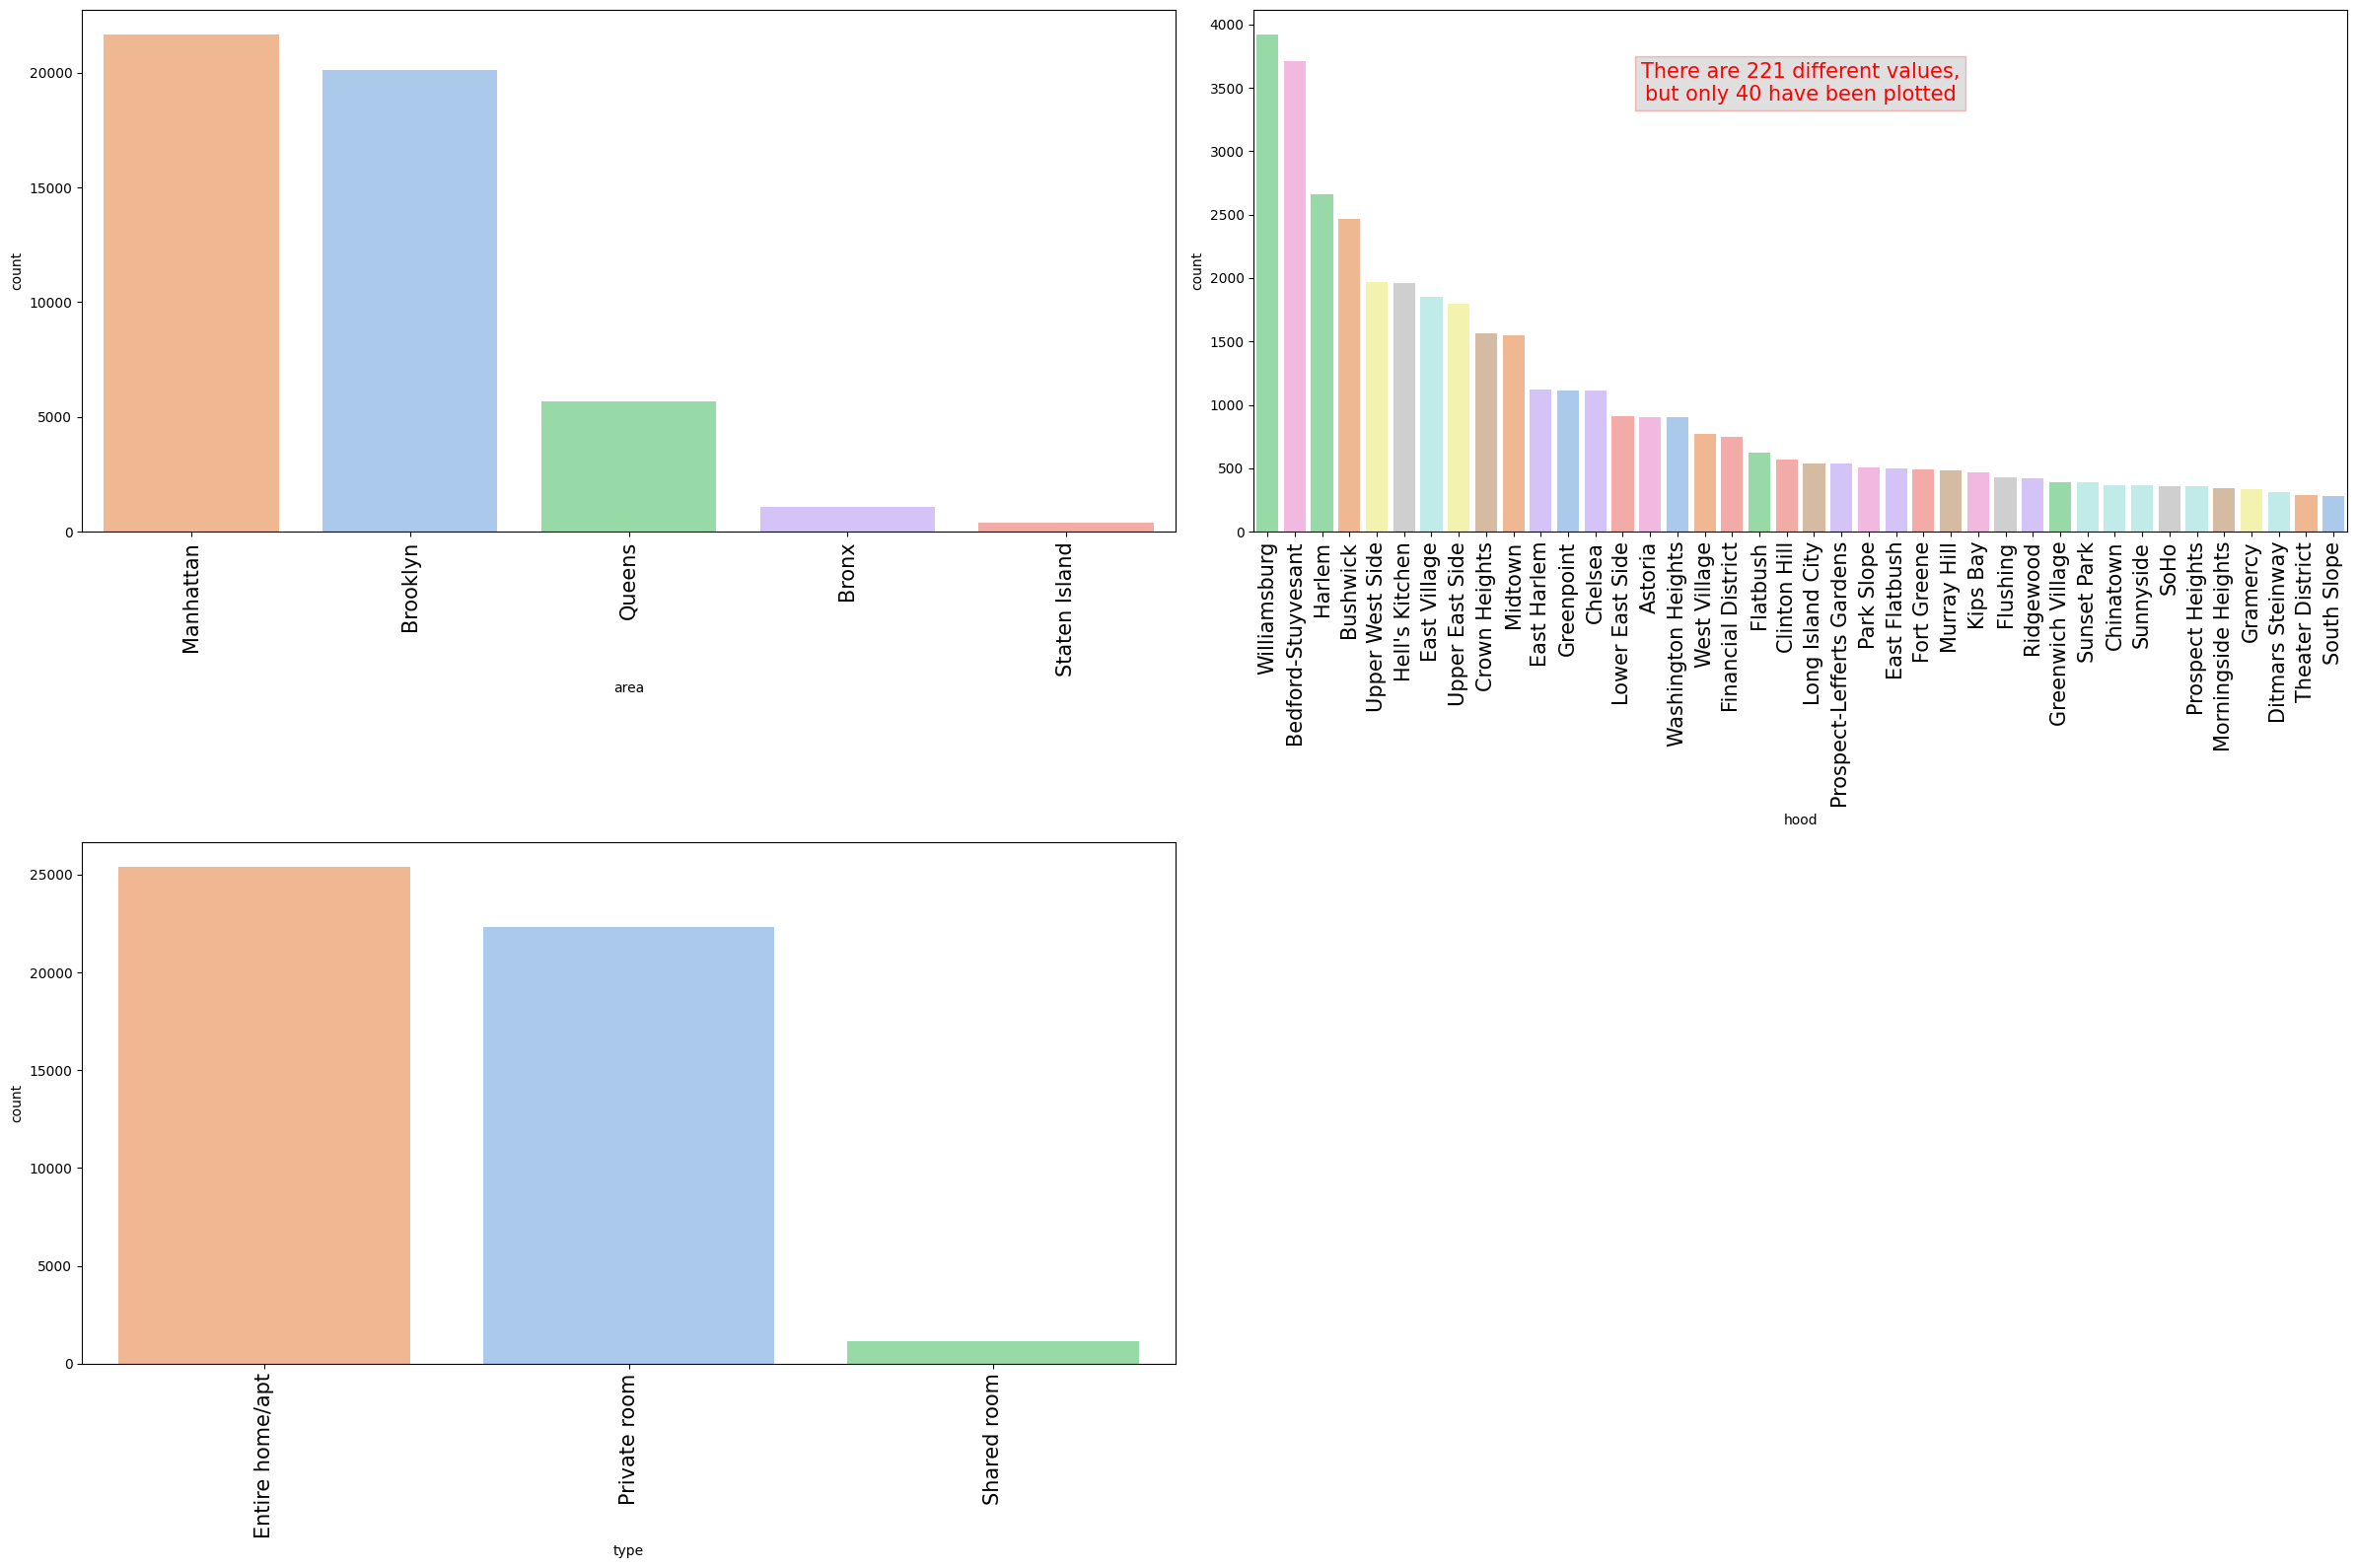

--------------------------------------------------------------
--------------------------------------------------------------

STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var


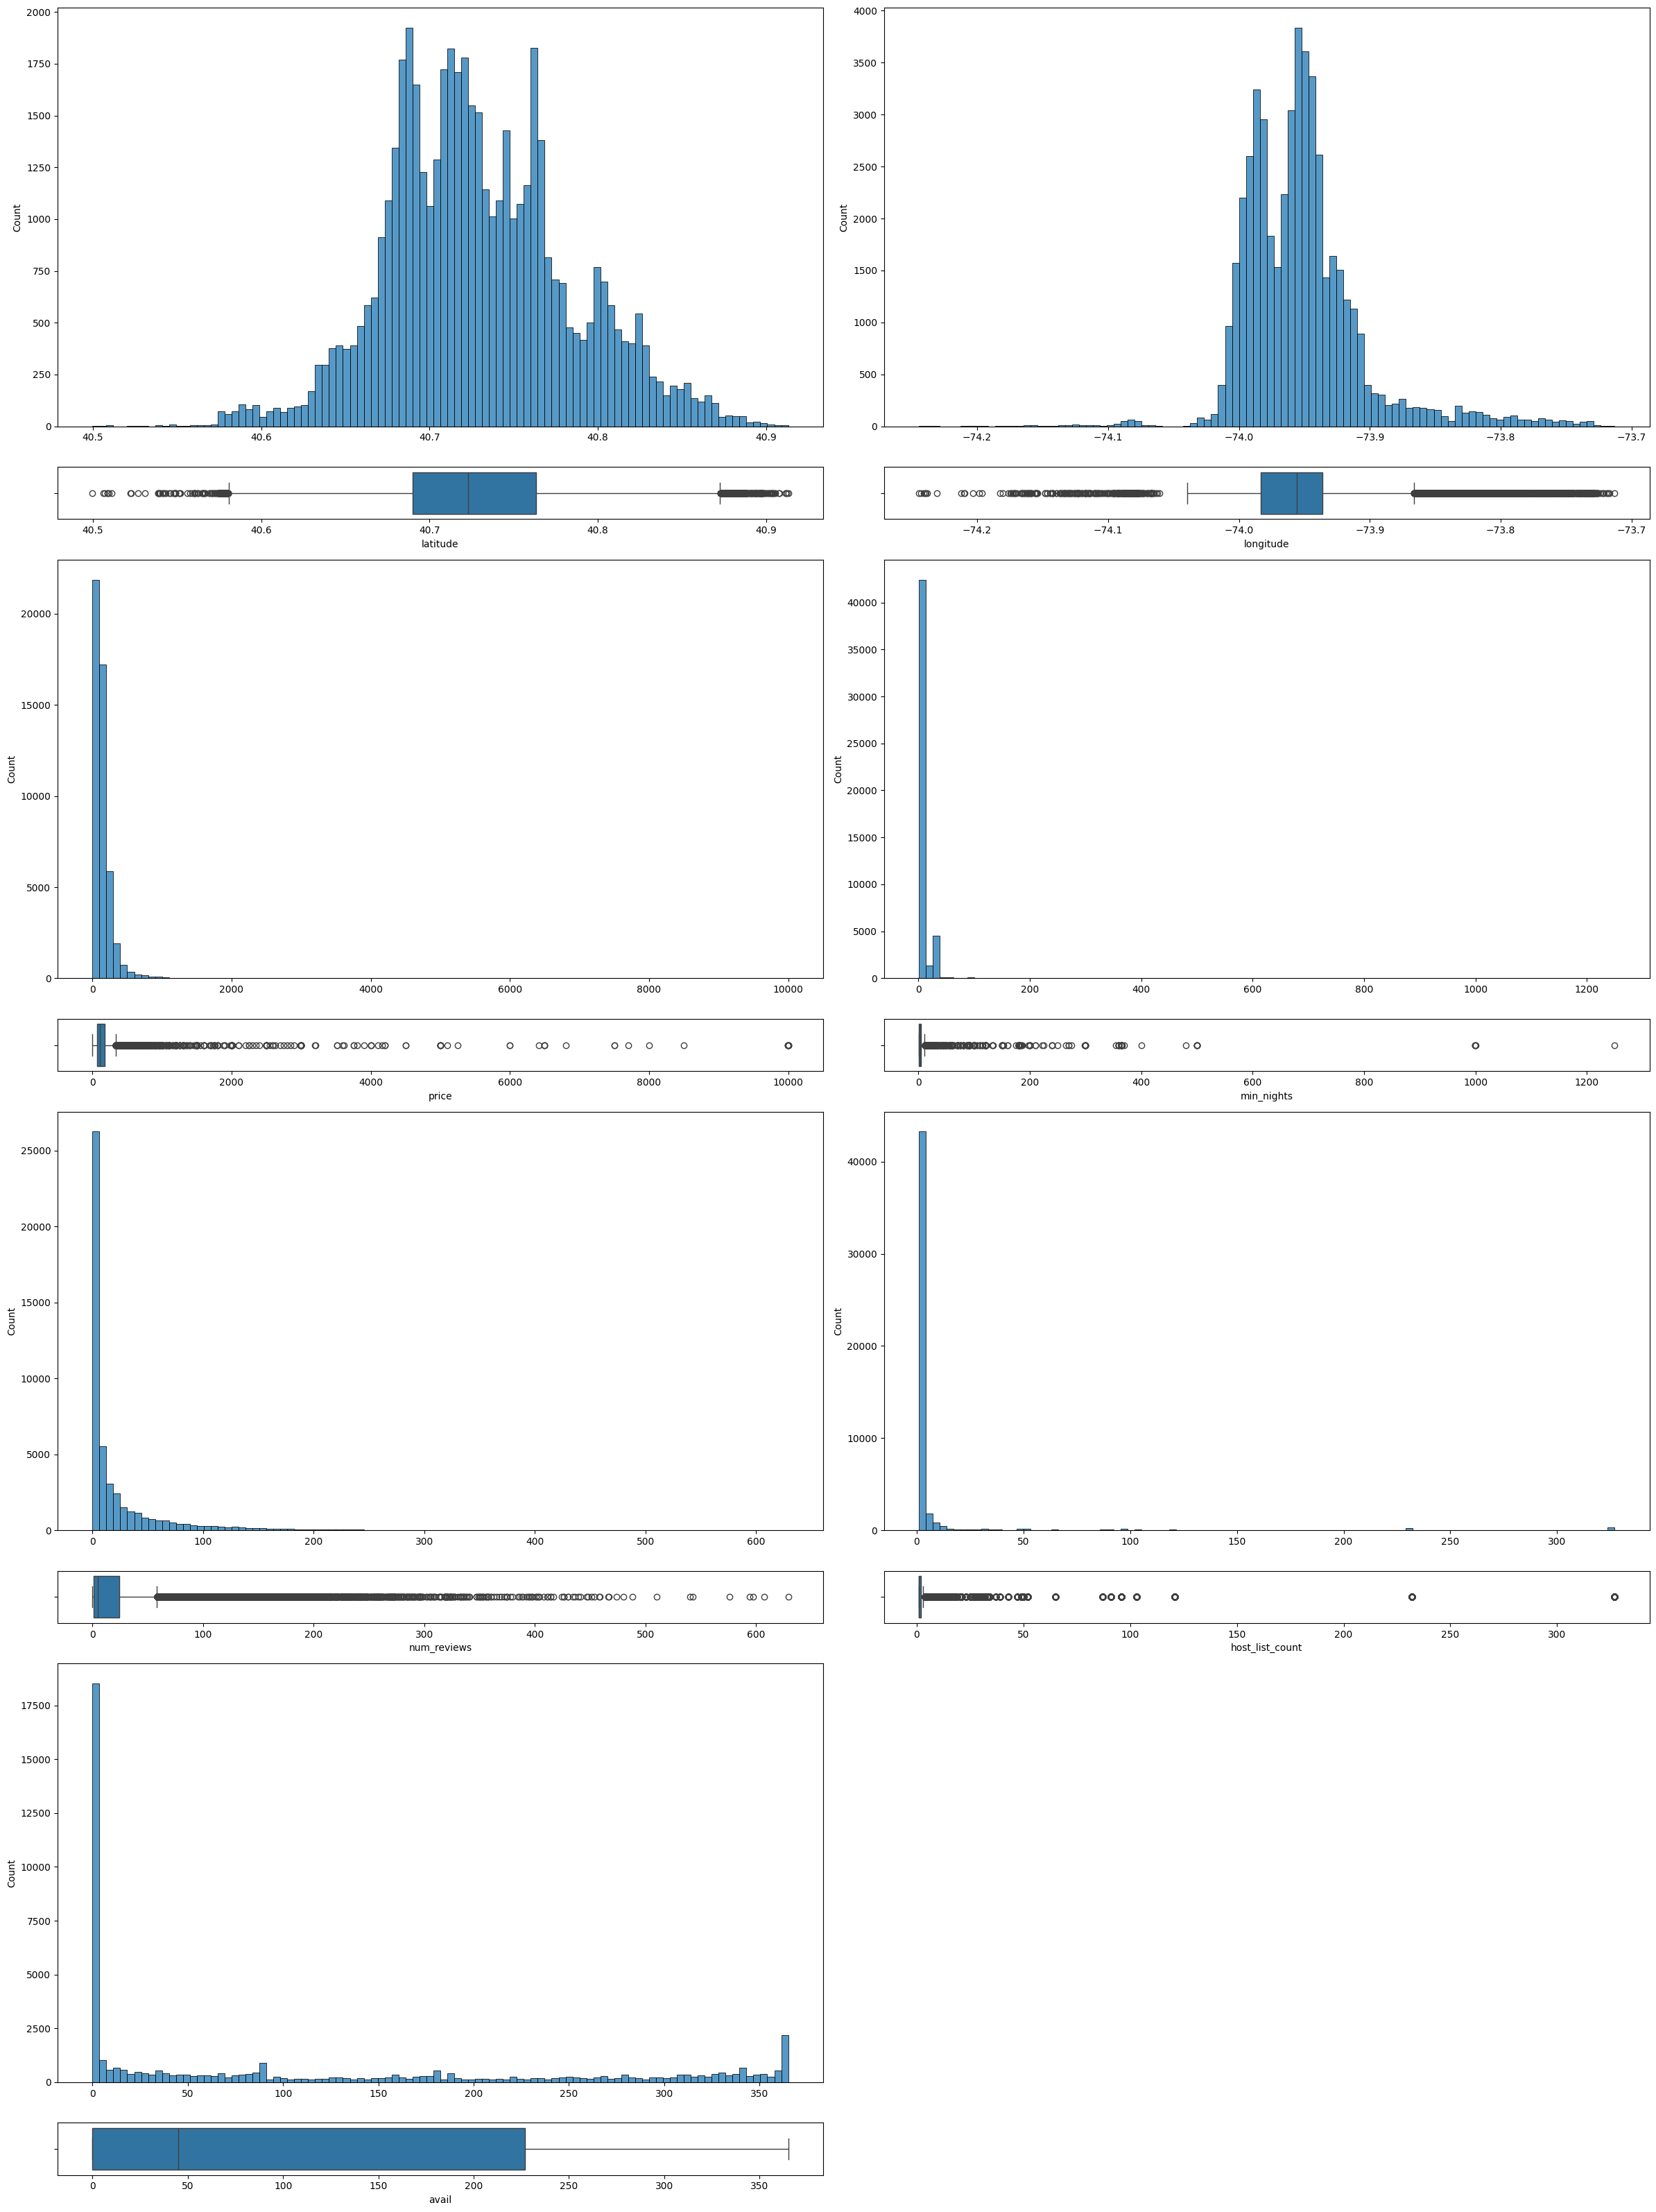

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.1) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)


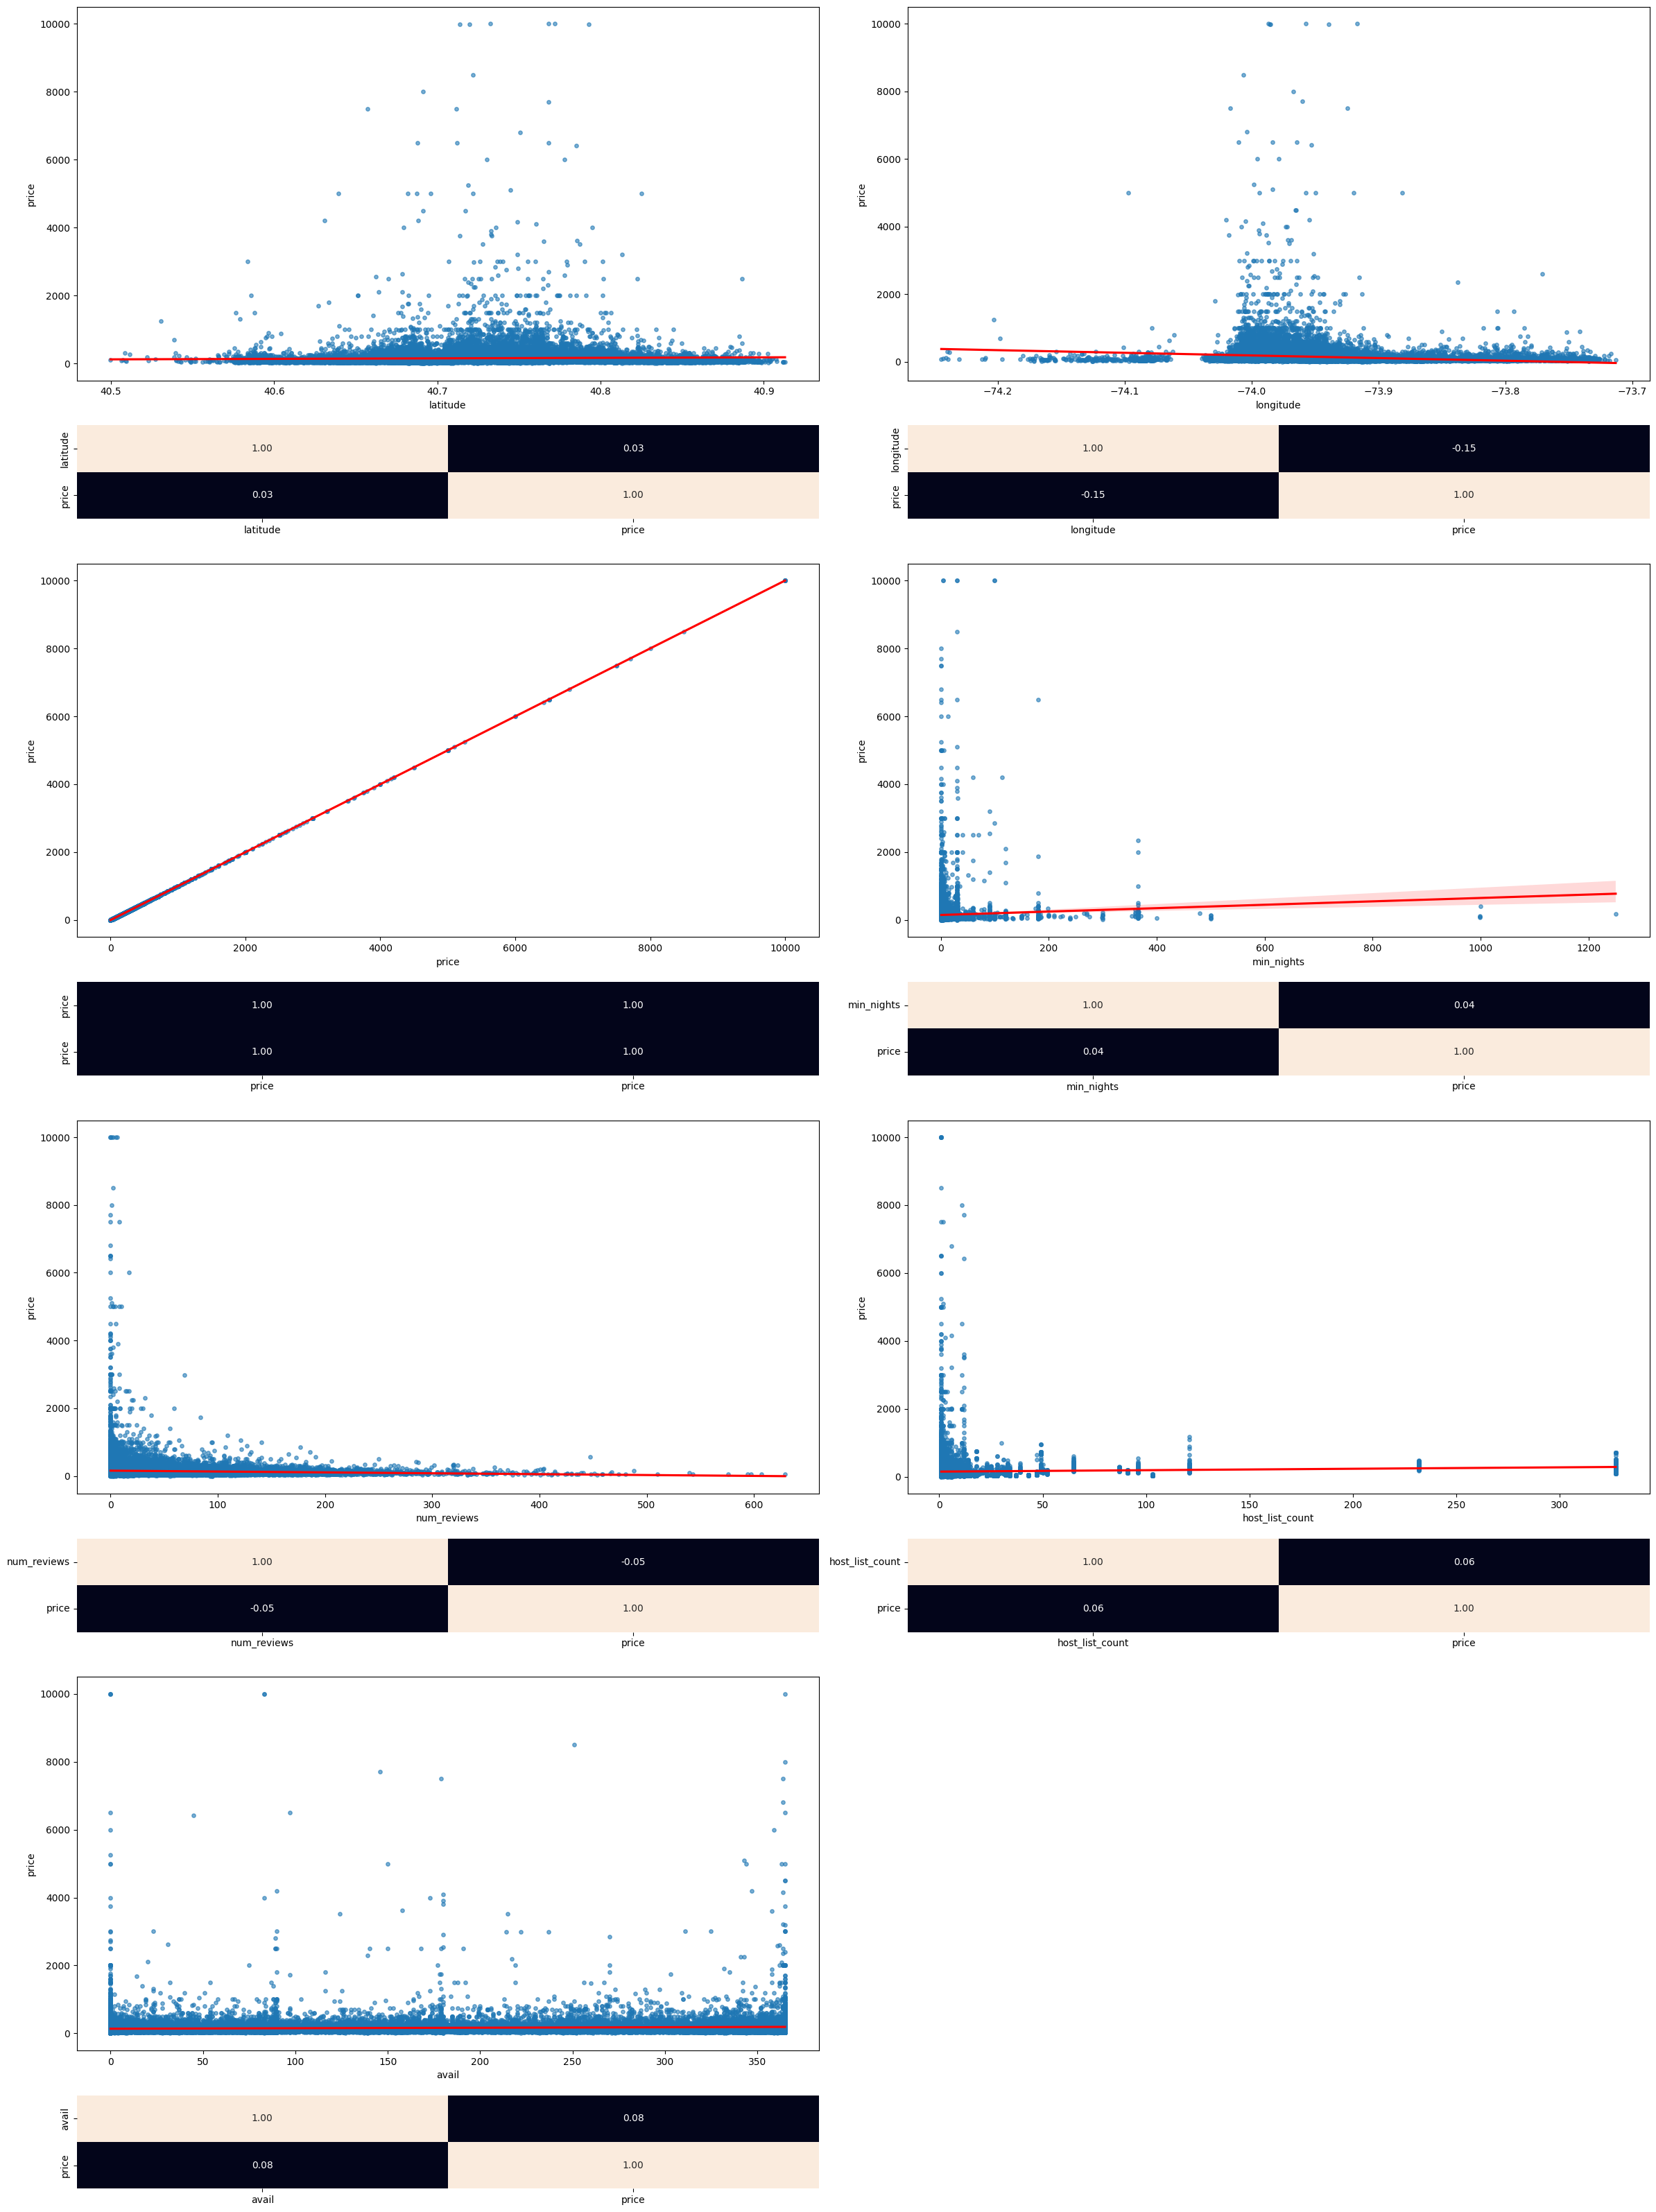

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)


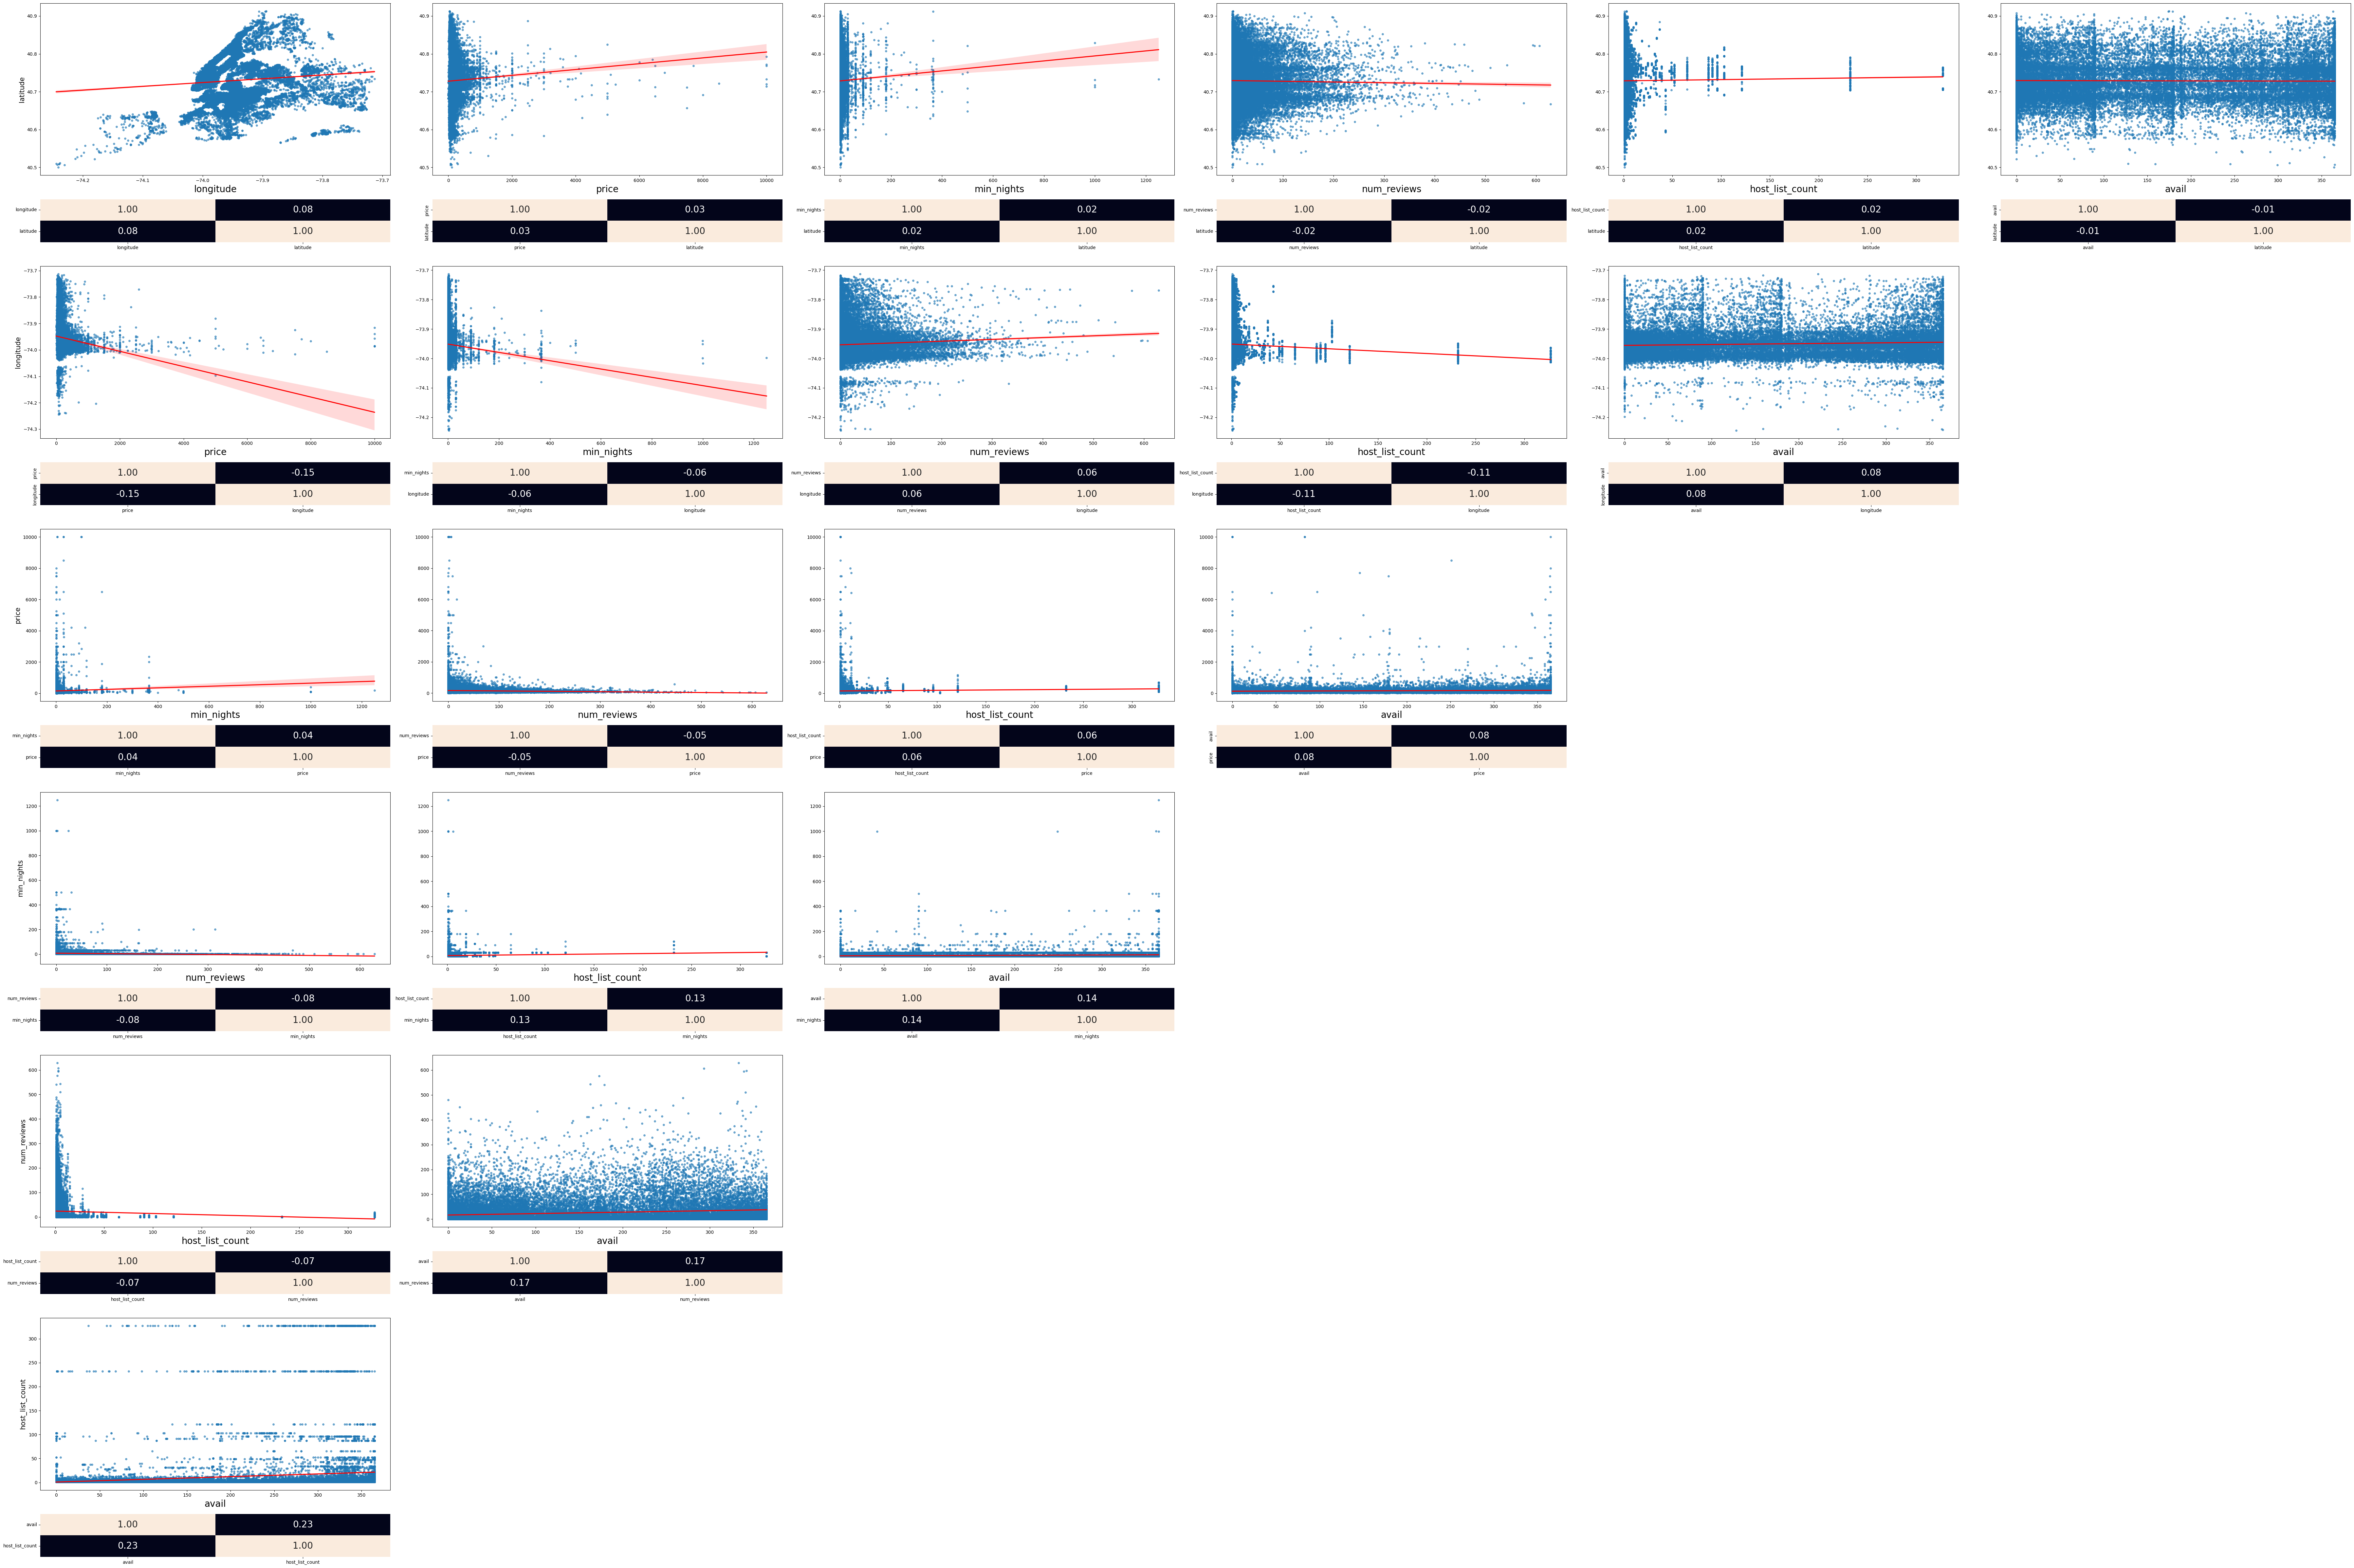

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)


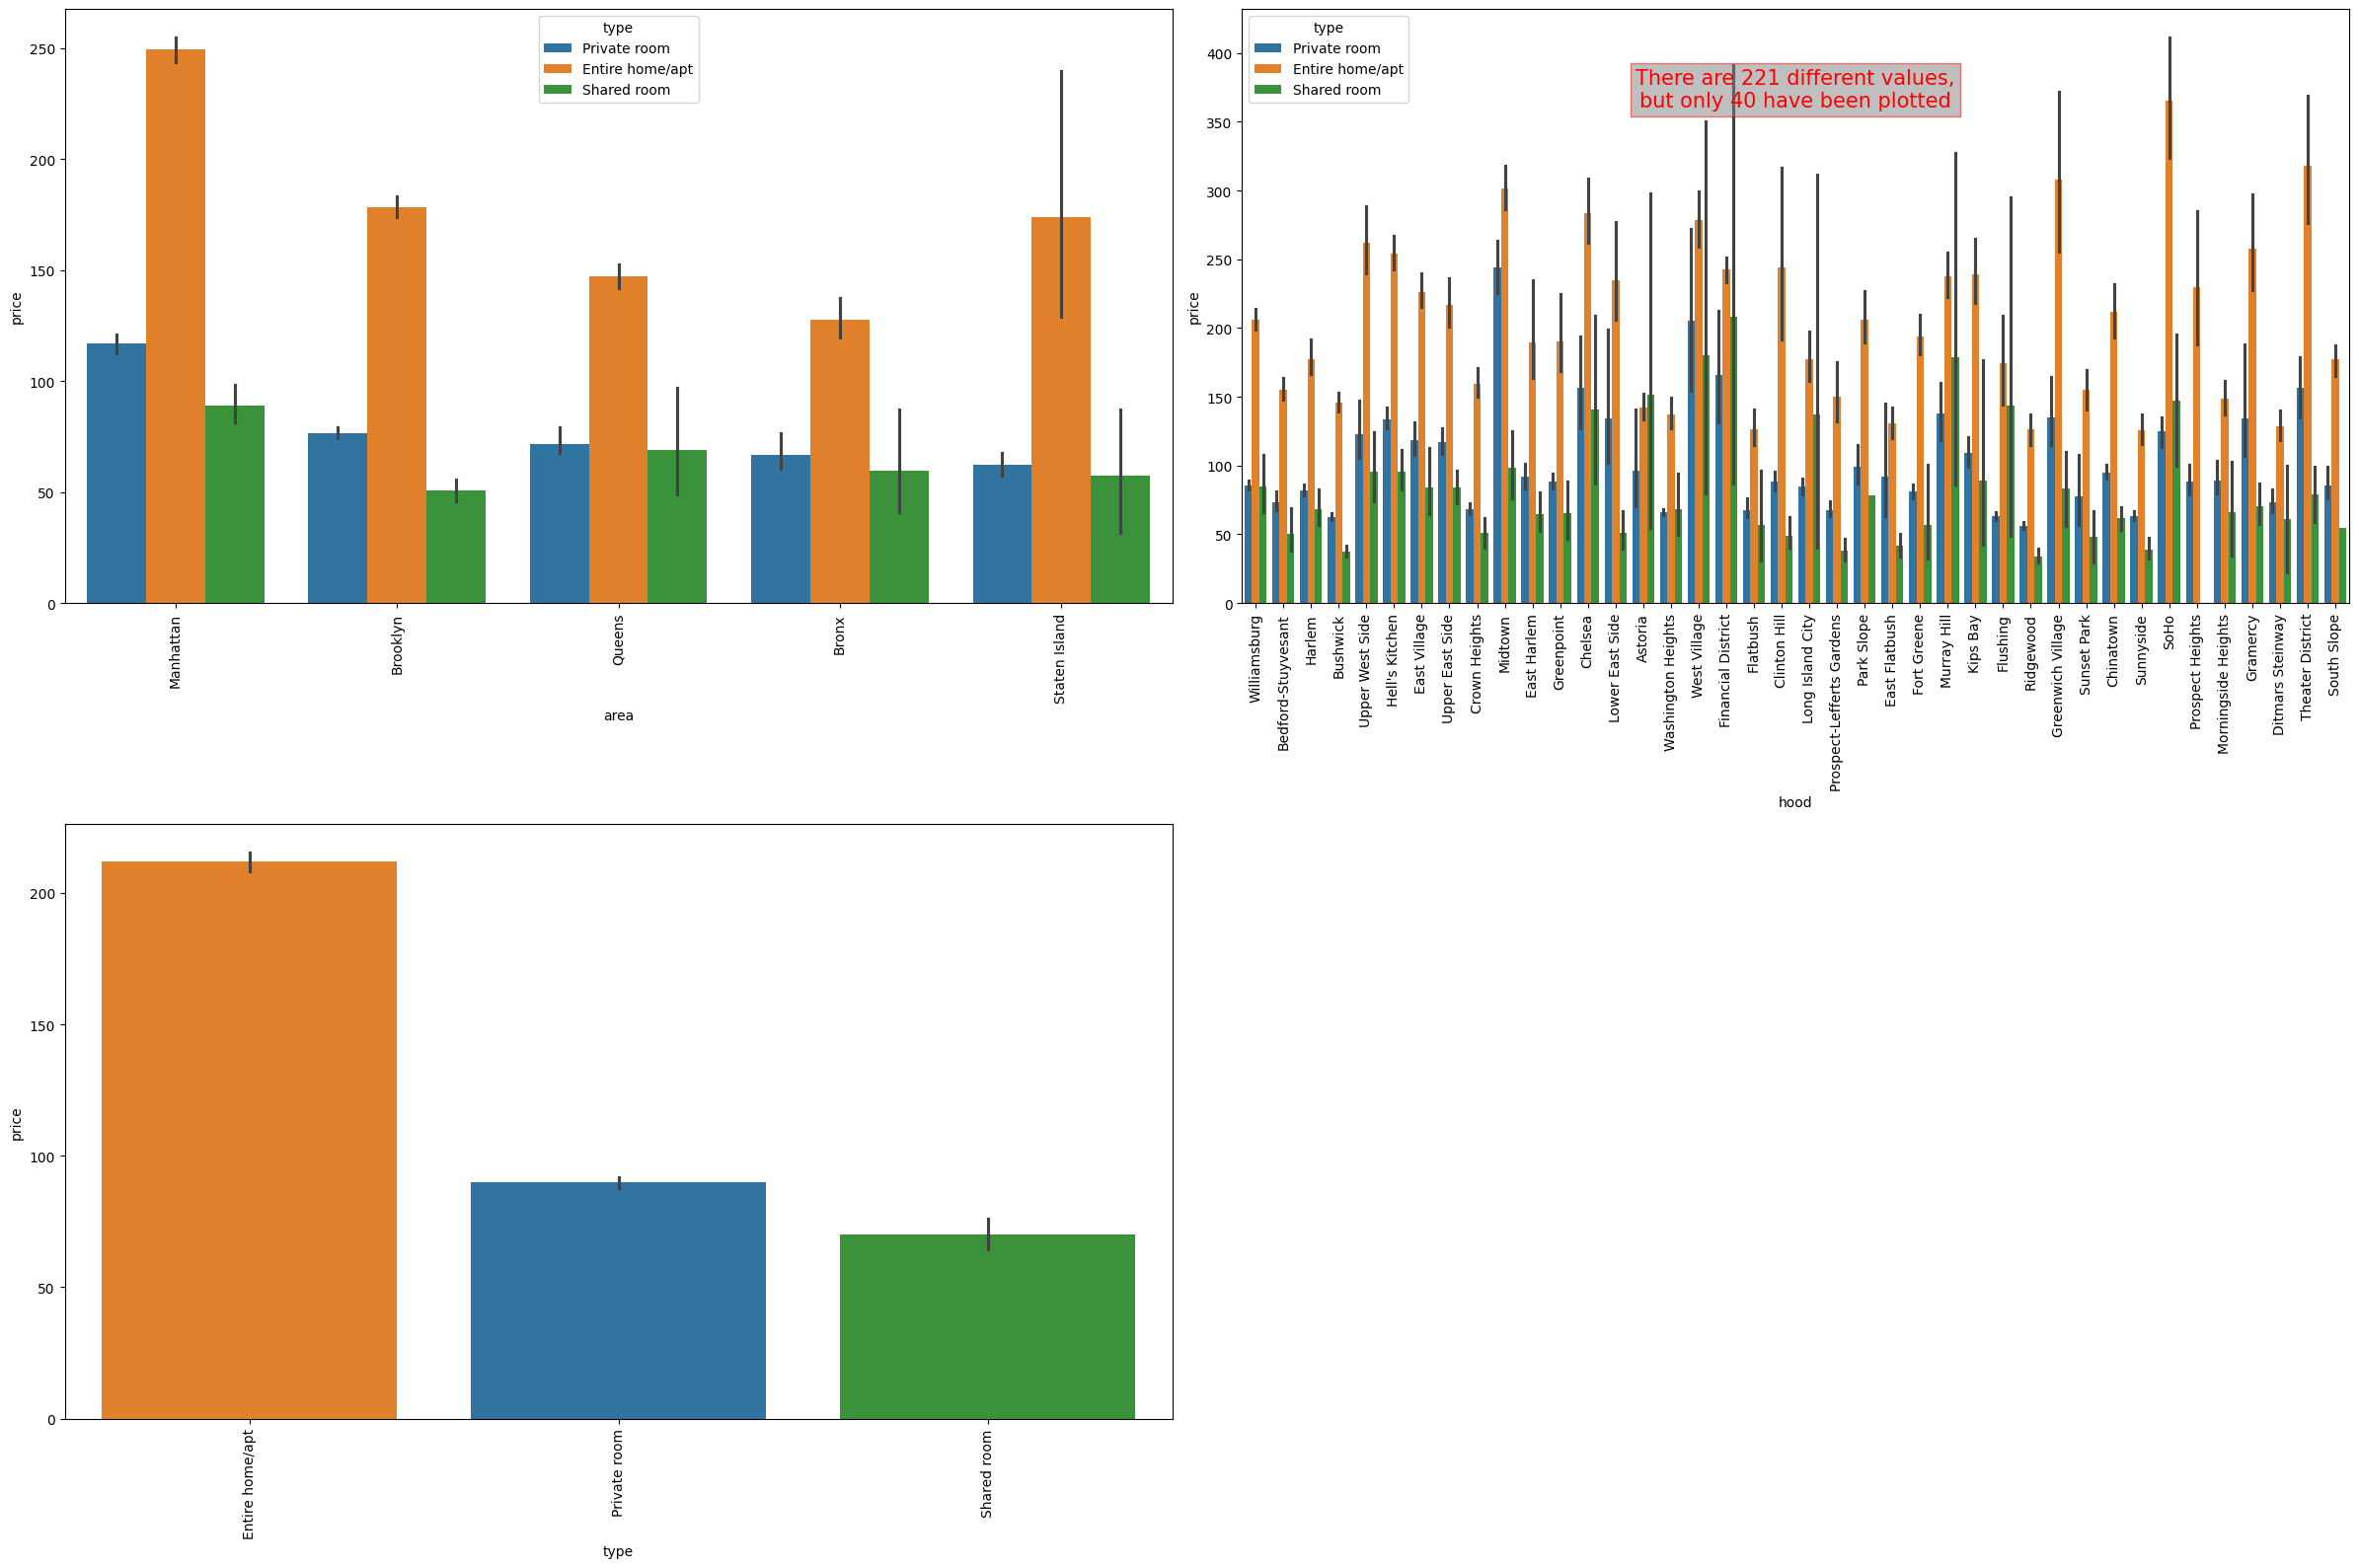

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap)


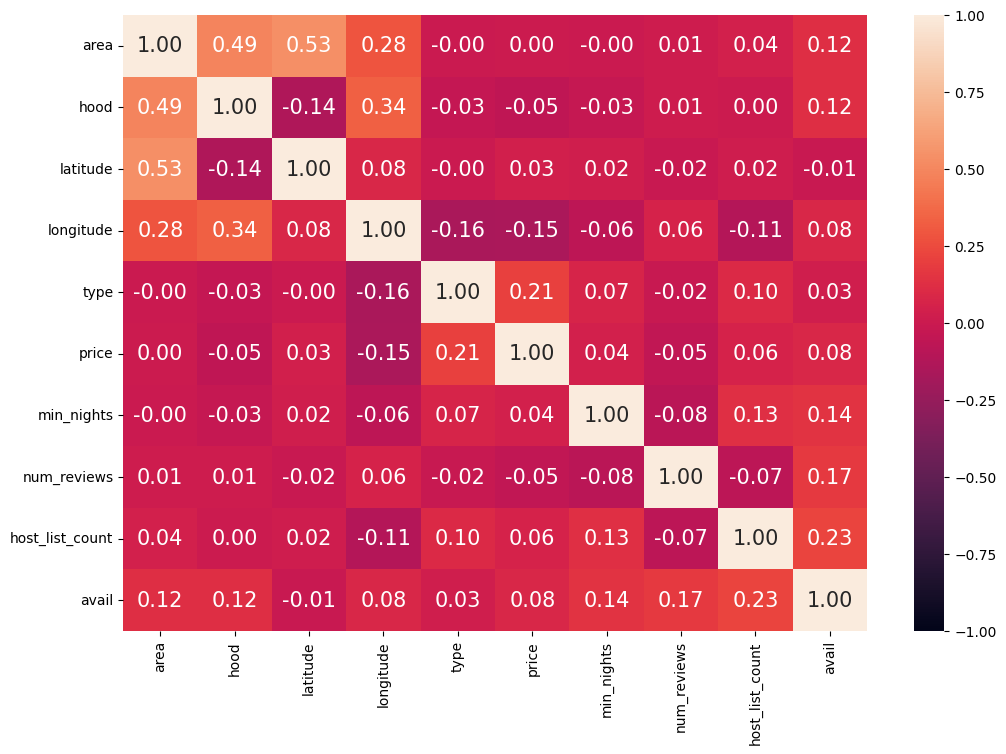

<Figure size 1200x800 with 0 Axes>

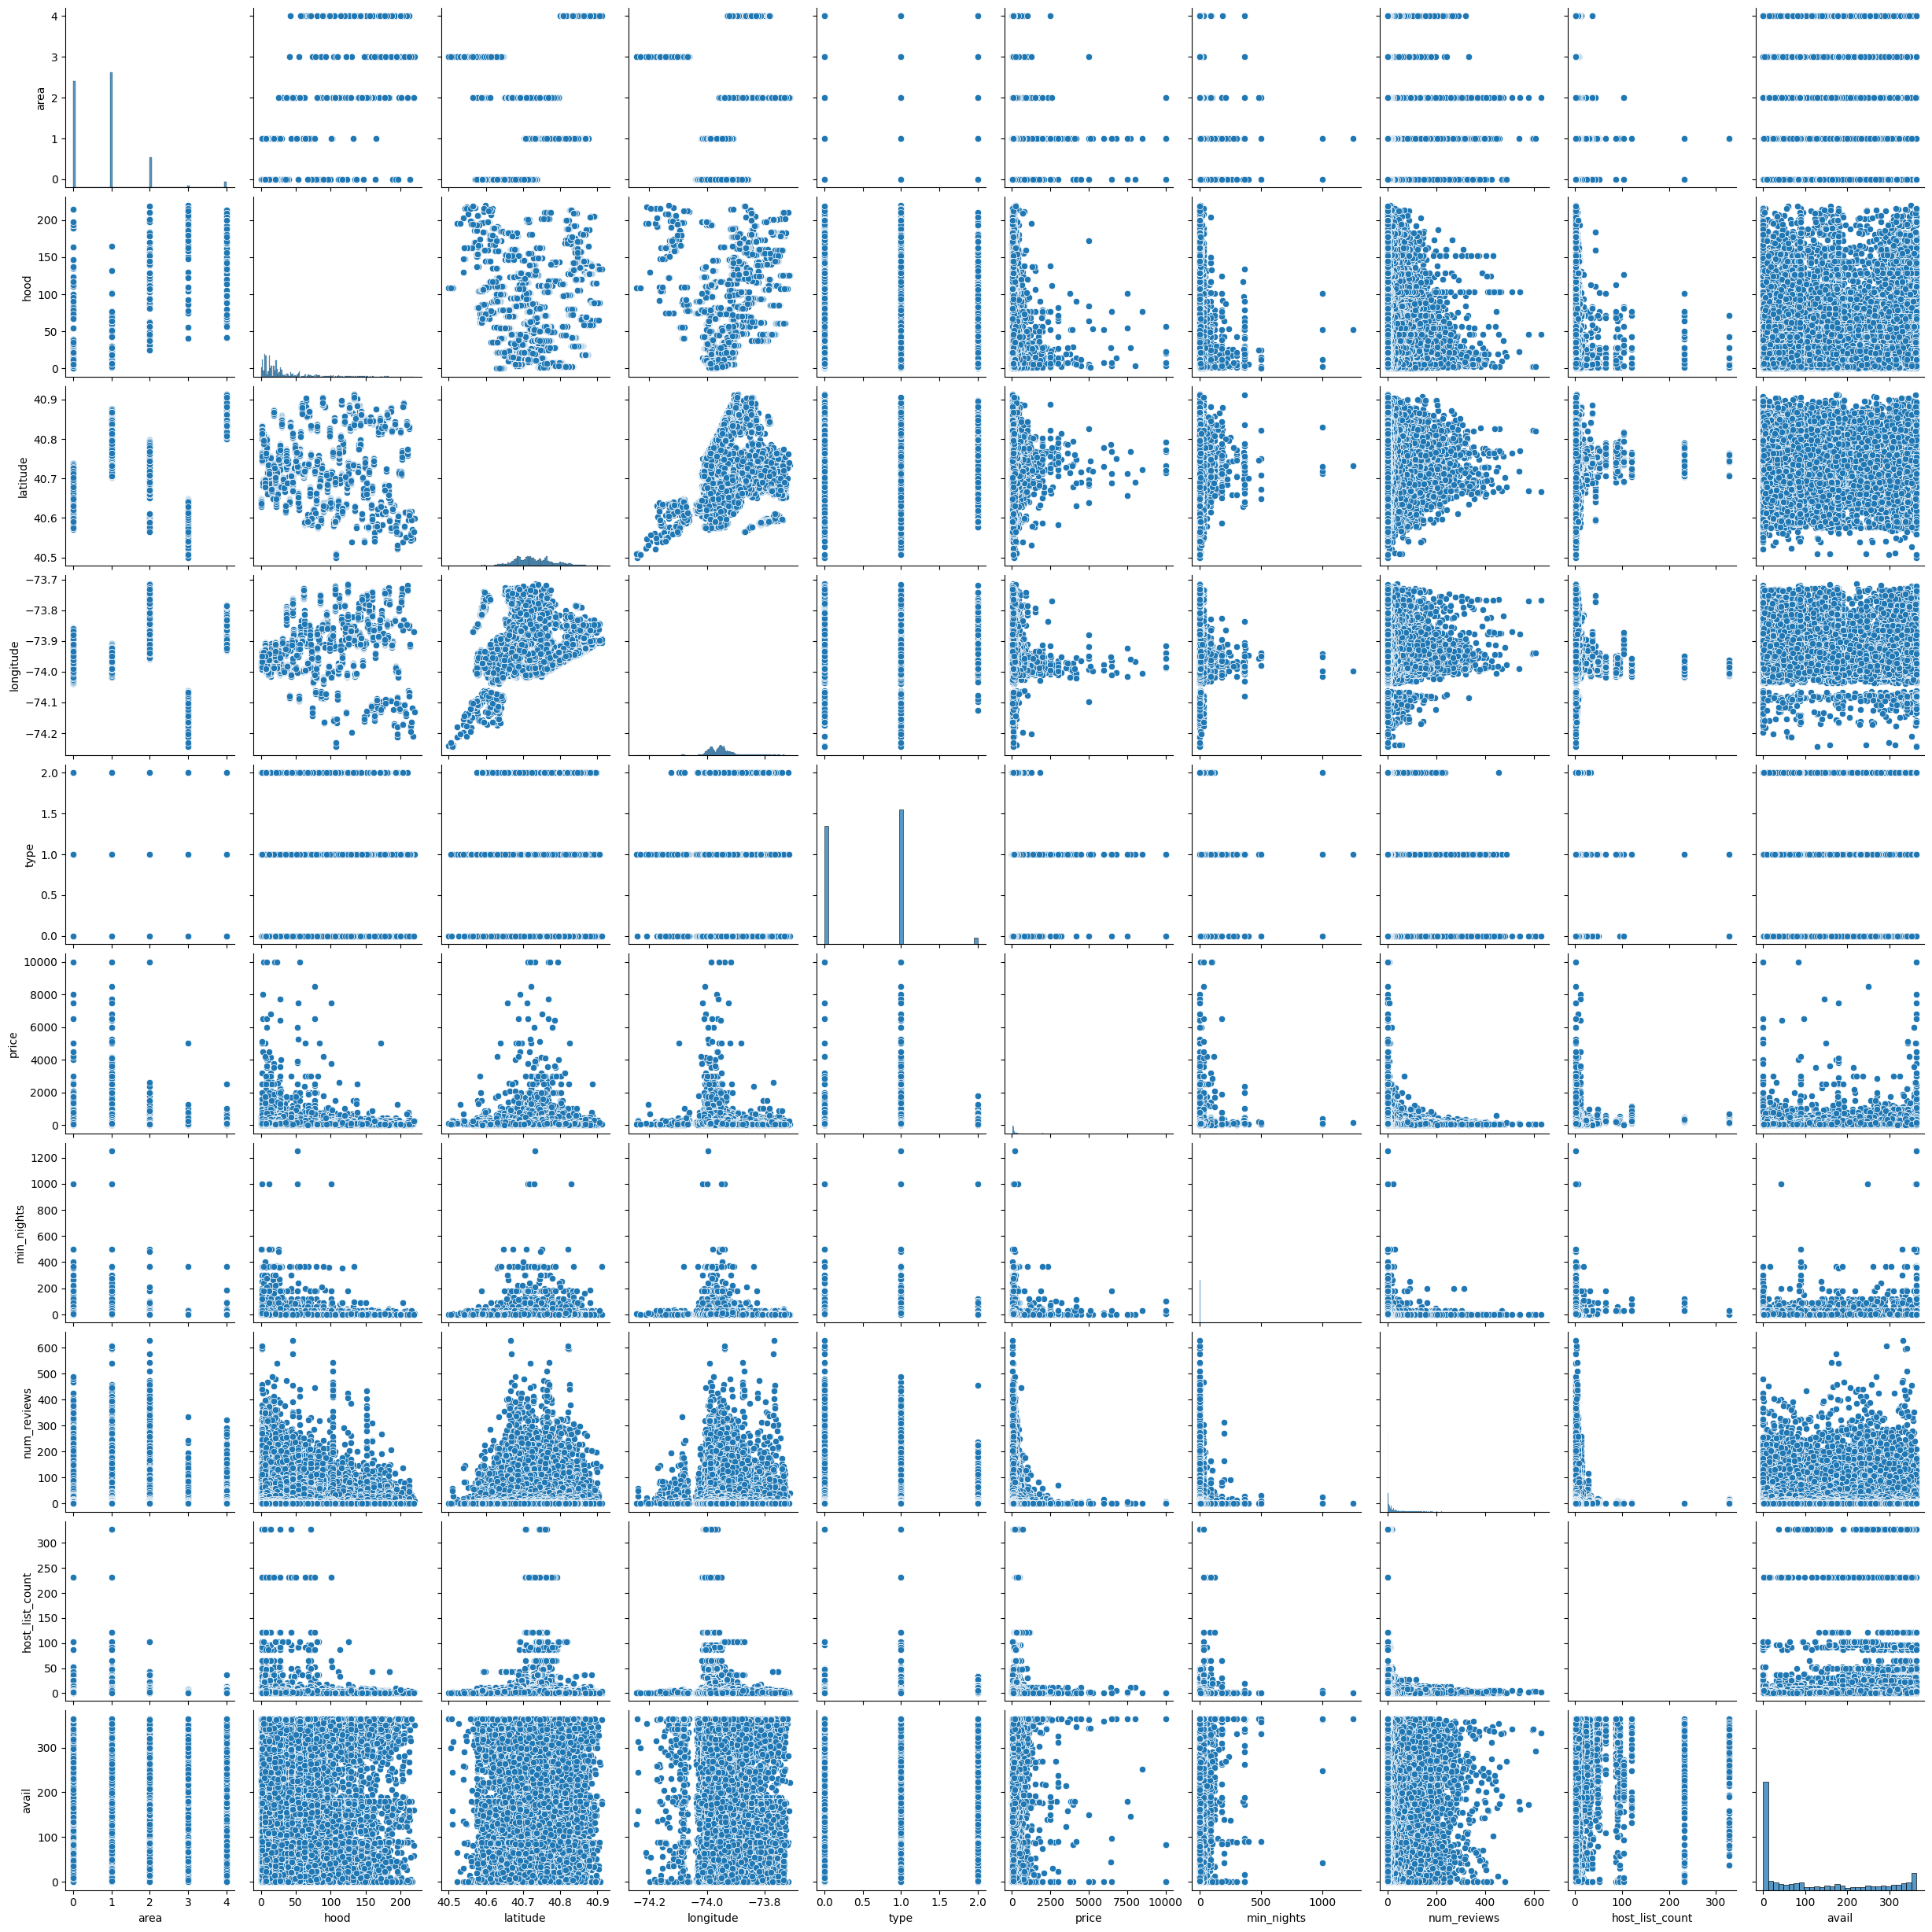

--------------------------------------------------------------
--------------------------------------------------------------

STEP 8.1) DEFINE OUTLIERS


latitude     longitude         price    min_nights   num_reviews  \
count  48895.000000  48895.000000  48895.000000  48895.000000  48895.000000   
mean      40.728949    -73.952170    152.720687      7.029962     23.274466   
std        0.054530      0.046157    240.154170     20.510550     44.550582   
min       40.499790    -74.244420      0.000000      1.000000      0.000000   
25%       40.690100    -73.983070     69.000000      1.000000      1.000000   
50%       40.723070    -73.955680    106.000000      3.000000      5.000000   
75%       40.763115    -73.936275    175.000000      5.000000     24.000000   
max       40.913060    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count         avail  
count     48895.000000  48895.000000  
mean          7.143982    112.781327  
std          32.952519    131.622289  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     45.000000  
75%           2.000000    227.000000  
max         327.000000    365.000000

(48895, 10)

latitude    longitude        price   min_nights  \
lower_limit          40.580578   -74.053263   -90.000000    -5.000000   
upper_limit          40.872637   -73.866082   334.000000    11.000000   
n_outliers_lower    171.000000   373.000000     0.000000     0.000000   
n_outliers_upper    254.000000  2460.000000  2972.000000  6607.000000   
pct_outliers_lower    0.349729     0.762859     0.000000     0.000000   
pct_outliers_upper    0.519481     5.031189     6.078331    13.512629   

                    num_reviews  host_list_count  avail  
lower_limit          -33.500000        -0.500000 -340.5  
upper_limit           58.500000         3.500000  567.5  
n_outliers_lower       0.000000         0.000000    0.0  
n_outliers_upper    6021.000000      7081.000000    0.0  
pct_outliers_lower     0.000000         0.000000    0.0  
pct_outliers_upper    12.314143        14.482053    0.0

--------------------------------------------------------------
--------------------------------------------------------------

STEP 8.2) CLEAN OUTLIERS
- ATTRIBUTE latitude:
REMOVED lower outliers (0.35% <= 5.0%)
REMOVED upper outliers (0.52% <= 5.0%)


- ATTRIBUTE longitude:
REMOVED lower outliers (0.76% <= 5.0%)
KEPT upper outliers (5.03% > 5.0%)


- ATTRIBUTE price:
REMOVED lower outliers (0.00% <= 5.0%)
KEPT upper outliers (6.08% > 5.0%)


- ATTRIBUTE min_nights:
REMOVED lower outliers (0.00% <= 5.0%)
KEPT upper outliers (13.51% > 5.0%)


- ATTRIBUTE num_reviews:
REMOVED lower outliers (0.00% <= 5.0%)
KEPT upper outliers (12.31% > 5.0%)


- ATTRIBUTE host_list_count:
REMOVED lower outliers (0.00% <= 5.0%)
KEPT upper outliers (14.48% > 5.0%)


- ATTRIBUTE avail:
REMOVED lower outliers (0.00% <= 5.0%)
REMOVED upper outliers (0.00% <= 5.0%)


Outliers cleaning completed.
 - Original df's rows: 48895
 - Cleaned df's  rows: 48163


latitude     longitude         price    min_nights   num_reviews  \
count  48163.000000  48163.000000  48163.000000  48163.000000  48163.000000   
mean      40.729375    -73.951383    153.301933      7.056952     23.238336   
std        0.052167      0.043936    240.186546     20.497308     44.608743   
min       40.580780    -74.039420      0.000000      1.000000      0.000000   
25%       40.690810    -73.982680     69.000000      1.000000      1.000000   
50%       40.723380    -73.955570    109.000000      3.000000      5.000000   
75%       40.762955    -73.936550    178.000000      5.000000     23.000000   
max       40.872570    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count         avail  
count     48163.000000  48163.000000  
mean          7.218176    111.628366  
std          33.194994    131.220145  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     43.000000  
75%           2.000000    223.000000  
max         327.000000    365.000000

--------------------------------------------------------------
--------------------------------------------------------------

STEP 9) MISSING VALUES
DataFrame has no missing values at all
- Remaining missing values per column:
area               0
hood               0
latitude           0
longitude          0
type               0
price              0
min_nights         0
num_reviews        0
host_list_count    0
avail              0
dtype: int64


In [ ]:
# STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
print("STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_2 = df_S5_1.copy()

# List of columns
columns = df_S5_2.columns.tolist()

# Validate box inputs
for i in range(len(data_type)):
    if  data_type[i].value not in ["CATEGORY", "NUMERIC"]:
        raise ValueError("- ❌ Missing Data Type selection in column " + columns[i])
print("- ✅ All Data Type selections validated successfully")

# Store Attributes by Data Type
category_var = []
numeric_var = []
for i in range(len(columns)):
    if data_type[i].value == "CATEGORY":
        category_var.append(columns[i])
    else:
        numeric_var.append(columns[i])
print("- ℹ️ Confirmed CATEGORY Attributes: " + str(category_var))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_var))

combi_var_true_count = 0    
for i in range(len(combi_var)):
    if combi_var[i].value == True:
        combi_var_true_count += 1
        if data_type[i].value == "NUMERIC":
            raise ValueError("❌ Combination attribute for multivariant analysis must be a CATEGORY attribute!")
if combi_var_true_count == 0:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (none selected)")
if combi_var_true_count > 1:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (selected " + str(combi_var_true_count) + ")")
print("- ✅ Combination attribute validated successfully")

# Store combination attribute
for i in range(len(columns)):
    if combi_var[i].value == True and data_type[i].value == "CATEGORY":
        cat_var_comb = columns[i]
# Print confirmed Data Types
print("- ℹ️ Confirmed combination attribute: " + cat_var_comb)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var
print("STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var")

# Copy  of previous DataFrame
df_S6_1 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S6_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S6_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S6_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S6_1,
        x = col,
        hue = col,
        palette = my_palette,
        order = order,
        legend = False
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var
print("STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var")

# Copy  of previous DataFrame
df_S6_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols =  num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Histogram (top)
        sns.histplot(
            ax = axes[row * 2, col],
            data = df_S6_2,
            x = var_to_plot[var_idx],
            bins = num_bins
        ).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(
            ax=axes[row * 2 + 1, col],
            data=df_S6_2,
            x = var_to_plot[var_idx]
        )
        var_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.1) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)
print("STEP 7.1) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)")

# Copy  of previous DataFrame
df_S7_1 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Regplot (top)
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_1,
            x = var_to_plot[var_idx],
            y = y_var,
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        )

        # Boxplot (bottom)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_1[[var_to_plot[var_idx], y_var]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False
        )
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)
print("STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)")

# Copy  of previous DataFrame
df_S7_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = len(var_to_plot) - 1,
    figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Flatten axes for easy handling
axes = np.array(axes)

# Track subplot usage
for row in range(num_rows):
    n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
    for col in range(n_cols):

        # Top: regplot
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_2,
            x = var_to_plot[row + col + 1],
            y = var_to_plot[row],
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        ).set_xlabel(var_to_plot[row + col + 1],fontsize=20)

        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_2[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False,
            annot_kws = {"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, len(var_to_plot) - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)
print("STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)")

# Copy  of previous DataFrame
df_S7_3 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows)
)

# flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:

    # Count unique values
    unique_count = df_S7_3[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S7_3[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S7_3[col].value_counts().index
    
    # Create barplot
    sns.barplot(
        ax=axes[idx],
        data = df_S7_3,
        x = col,
        y = y_var,
        hue = cat_var_comb,
        order = order,
        ).tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize = my_font_size,
            color = 'red',
            ha = 'center',
            va = 'top',
            bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap + Pairplot)
print("STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap)")

# Copy  of previous DataFrame
df_S7_4 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot

# Encode categorical variables using the Series.factorize() method
for col in var_to_plot:
    codes, uniques = df_S7_4[col].factorize()
    df_S7_4[col] = codes  # replace column with integer codes

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Glboal heatmap
sns.heatmap(
    data = df_S7_4.corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    fmt = ".2f",
    annot_kws = {"size": my_font_size}
        )
# Display
plt.show()

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Create pairplot
sns.pairplot(
    data = df_S7_4
)

# Display
plt.show()

In [21]:
# STEP 8.1) DEFINE OUTLIERS
print("STEP 8.1) DEFINE OUTLIERS")

# Copy  of previous DataFrame
df_S8_1=df_S5_2.copy()

# Print info
display(df_S8_1.describe())
display(df_S8_1.shape)

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []

len(df_S8_1.index)

for col in cols:
    Q1 = df_S8_1[col].quantile(0.25)
    Q3 = df_S8_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count num of outliers
    n_low = (df_S8_1[col] < lower).sum()
    n_high = (df_S8_1[col] > upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S8_1.index)) * 100
    pct_high = (n_high / len(df_S8_1.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
# Display results
display(df_limits)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 8.2) CLEAN OUTLIERS
print("STEP 8.2) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S8_2=df_S8_1.copy()

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var

# Loop through each column and apply filtering rules
for col in cols:
    low_limit = df_limits.loc["lower_limit", col]
    high_limit = df_limits.loc["upper_limit", col]
    pct_low = df_limits.loc["pct_outliers_lower", col]
    pct_high = df_limits.loc["pct_outliers_upper", col]
    
    # Remove low outliers if below threshold
    print(f"- ATTRIBUTE {col}:")
    if pct_low <= th_low:
        df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
        print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {th_low}%)")
    else:
        print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {th_low}%)")
    
    # Remove high outliers if below threshold
    if pct_high <= th_high:
        df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
        print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {th_high}%)")
    else:
        print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {th_high}%)")
    print("\n")
print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8_1)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S8_2)}")
display(df_S8_2.describe())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 9) MISSING VALUES
print("STEP 9) MISSING VALUES")

# Copy  of previous DataFrame
df_S9 = df_S8_2.copy()

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S9[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S9.isnull().sum() / len(df_S9)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S9.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S9 = pd.merge(df_S9, medians, on=group_vars, how="left")

            # Fill missing values
            df_S9[col] = df_S9[col].fillna(df_S9[f"median_{col}"])

            # Drop helper column
            df_S9 = df_S9.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S9 = df_S9.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S9.isnull().sum()}")

print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# SPLIT)
print("SPLIT) X_train, X_test, y_train, y_test")

# Copy  of previous DataFrame
df_SPLIT = df_S9.copy()

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

STEP 8.1) DEFINE OUTLIERS


latitude     longitude         price    min_nights   num_reviews  \
count  48895.000000  48895.000000  48895.000000  48895.000000  48895.000000   
mean      40.728949    -73.952170    152.720687      7.029962     23.274466   
std        0.054530      0.046157    240.154170     20.510550     44.550582   
min       40.499790    -74.244420      0.000000      1.000000      0.000000   
25%       40.690100    -73.983070     69.000000      1.000000      1.000000   
50%       40.723070    -73.955680    106.000000      3.000000      5.000000   
75%       40.763115    -73.936275    175.000000      5.000000     24.000000   
max       40.913060    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count         avail  
count     48895.000000  48895.000000  
mean          7.143982    112.781327  
std          32.952519    131.622289  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     45.000000  
75%           2.000000    227.000000  
max         327.000000    365.000000

(48895, 10)

latitude    longitude        price   min_nights  \
lower_limit          40.580578   -74.053263   -90.000000    -5.000000   
upper_limit          40.872637   -73.866082   334.000000    11.000000   
n_outliers_lower    171.000000   373.000000     0.000000     0.000000   
n_outliers_upper    254.000000  2460.000000  2972.000000  6607.000000   
pct_outliers_lower    0.349729     0.762859     0.000000     0.000000   
pct_outliers_upper    0.519481     5.031189     6.078331    13.512629   

                    num_reviews  host_list_count  avail  
lower_limit          -33.500000        -0.500000 -340.5  
upper_limit           58.500000         3.500000  567.5  
n_outliers_lower       0.000000         0.000000    0.0  
n_outliers_upper    6021.000000      7081.000000    0.0  
pct_outliers_lower     0.000000         0.000000    0.0  
pct_outliers_upper    12.314143        14.482053    0.0

--------------------------------------------------------------
--------------------------------------------------------------

STEP 8.2) CLEAN OUTLIERS
- ATTRIBUTE latitude:
 - ⚠️ REMOVED lower outliers (0.35% <= 5.0%)
 - ⚠️ REMOVED upper outliers (0.52% <= 5.0%)


- ATTRIBUTE longitude:
 - ⚠️ REMOVED lower outliers (0.76% <= 5.0%)
 - ✅ KEPT upper outliers (5.03% > 5.0%)


- ATTRIBUTE price:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (6.08% > 5.0%)


- ATTRIBUTE min_nights:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (13.51% > 5.0%)


- ATTRIBUTE num_reviews:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (12.31% > 5.0%)


- ATTRIBUTE host_list_count:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (14.48% > 5.0%)


- ATTRIBUTE avail:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED upper outliers (0.00% <= 5.0%)


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 48895
 

latitude     longitude         price    min_nights   num_reviews  \
count  48163.000000  48163.000000  48163.000000  48163.000000  48163.000000   
mean      40.729375    -73.951383    153.301933      7.056952     23.238336   
std        0.052167      0.043936    240.186546     20.497308     44.608743   
min       40.580780    -74.039420      0.000000      1.000000      0.000000   
25%       40.690810    -73.982680     69.000000      1.000000      1.000000   
50%       40.723380    -73.955570    109.000000      3.000000      5.000000   
75%       40.762955    -73.936550    178.000000      5.000000     23.000000   
max       40.872570    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count         avail  
count     48163.000000  48163.000000  
mean          7.218176    111.628366  
std          33.194994    131.220145  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     43.000000  
75%           2.000000    223.000000  
max         327.000000    365.000000

--------------------------------------------------------------
--------------------------------------------------------------

STEP 9) MISSING VALUES
- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
area               0
hood               0
latitude           0
longitude          0
type               0
price              0
min_nights         0
num_reviews        0
host_list_count    0
avail              0
dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------

SPLIT) X_train, X_test, y_train, y_test
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (38530, 9)
 - X_test: (9633, 9)
 - y_train: (38530,)
 - y_test: (9633,)

